# CNN Transfer Learning
To use transfer learning on vgg16 from keras and to classify the breed of dogs given images of dog.

## Read Training Images of Dogs

In [1]:
import cv2
import numpy as np
import keras
from sklearn.datasets import load_files

datainfo = load_files('./dogImages/train')
dog_files = datainfo['filenames']
dog_targets = datainfo['target']


Using TensorFlow backend.


In [2]:
np.arange(len(dog_files))

array([   0,    1,    2, ..., 6677, 6678, 6679])

In [3]:
import matplotlib.pyplot as plt
dog_images = np.arange(len(dog_files))
for i in range(10):
    dog_images[i] = plt.imread(dog_files[i])

ValueError: setting an array element with a sequence.

AttributeError: 'list' object has no attribute 'tolist'

In [65]:
np.array(dog_images).reshape(10,427,640,3).shape

ValueError: cannot reshape array of size 10 into shape (10,427,640,3)

In [64]:
dog_images[0].shape

(427, 640, 3)

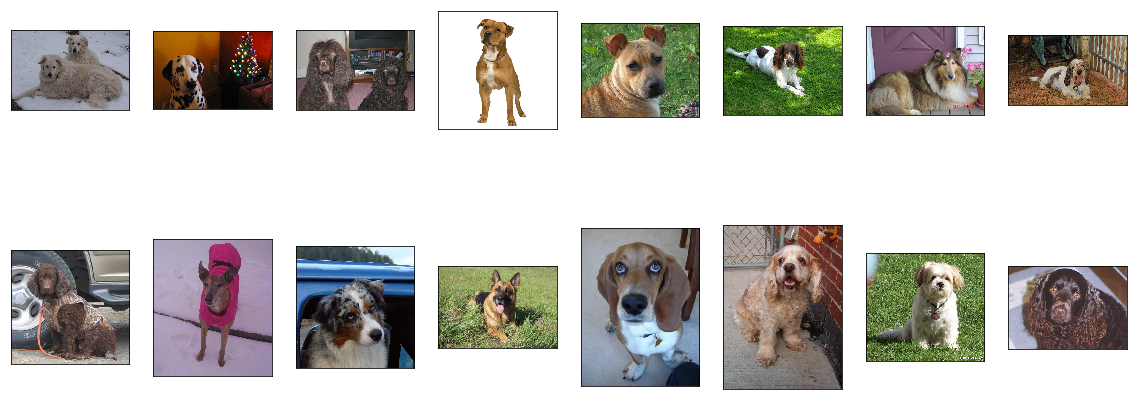

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))
for i in range(16):
    img = plt.imread(dog_files[i],format='jpeg')
    ax = fig.add_subplot(2,8,i+1,xticks=[],yticks=[])
    ax.imshow(img)

## Preprocess The Image Data
### normalize input images

In [45]:
import matplotlib.pyplot as plt
x_train = []
for file in dog_files:
    print (file)
    x_train.append(plt.imread(file,format='jpeg'))

./dogImages/train/095.Kuvasz/Kuvasz_06442.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04054.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00596.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00563.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04469.jpg
./dogImages/train/054.Collie/Collie_03789.jpg
./dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07705.jpg
./dogImages/train/009.American_water_spaniel/American_water_spaniel_00625.jpg
./dogImages/train/081.Greyhound/Greyhound_05559.jpg
./dogImages/train/012.Australian_shepherd/Australian_shepherd_00814.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04890.jpg
./dogImages/train/015.Basset_hound/Basset_hound_01094.jpg
./dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03768.jpg
./dogImages/train/099.Lhasa_ap

./dogImages/train/003.Airedale_terrier/Airedale_terrier_00215.jpg
./dogImages/train/020.Belgian_malinois/Belgian_malinois_01451.jpg
./dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05797.jpg
./dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07981.jpg
./dogImages/train/003.Airedale_terrier/Airedale_terrier_00188.jpg
./dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01366.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_03000.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05215.jpg
./dogImages/train/018.Beauceron/Beauceron_01316.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02802.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03079.jpg
./dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03557.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05875.jpg
./dogImages/train/122.Pointer/Pointer_07841.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06055.jpg
./dogImages/train/041.Bullmastiff/Bullmastif

./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03682.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05960.jpg
./dogImages/train/016.Beagle/Beagle_01174.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04829.jpg
./dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03574.jpg
./dogImages/train/054.Collie/Collie_03824.jpg
./dogImages/train/123.Pomeranian/Pomeranian_07871.jpg
./dogImages/train/009.American_water_spaniel/American_water_spaniel_00650.jpg
./dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07386.jpg
./dogImages/train/054.Collie/Collie_03798.jpg
./dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02333.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03718.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01725.jpg
./dogImages/train/092.Keeshond/Keeshond_06237.jpg
./dogImages/train/029.Border_collie/Border_collie_02067.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01706.jpg
./dogImages/train/046.Cava

./dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01819.jpg
./dogImages/train/103.Mastiff/Mastiff_06811.jpg
./dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07977.jpg
./dogImages/train/004.Akita/Akita_00259.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03262.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00527.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03418.jpg
./dogImages/train/009.American_water_spaniel/American_water_spaniel_00637.jpg
./dogImages/train/009.American_water_spaniel/American_water_spaniel_00652.jpg
./dogImages/train/014.Basenji/Basenji_01019.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06072.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04461.jpg
./dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04110.jpg
./dogImages/train/096.Labrador_retriever/Labrador_retriever_06450.jpg
./dogImages/train/042.Cairn_terrier/Cairn_te

./dogImages/train/034.Boxer/Boxer_02425.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_03026.jpg
./dogImages/train/017.Bearded_collie/Bearded_collie_01220.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04943.jpg
./dogImages/train/027.Bloodhound/Bloodhound_01896.jpg
./dogImages/train/049.Chinese_crested/Chinese_crested_03479.jpg
./dogImages/train/054.Collie/Collie_03850.jpg
./dogImages/train/054.Collie/Collie_03818.jpg
./dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03233.jpg
./dogImages/train/029.Border_collie/Border_collie_02073.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04287.jpg
./dogImages/train/032.Boston_terrier/Boston_terrier_02298.jpg
./dogImages/train/081.Greyhound/Greyhound_05558.jpg
./dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00716.jpg
./dogImages/train/082.Havanese/Havanese_05636.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03297.jpg
./dogImages/trai

./dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01975.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02715.jpg
./dogImages/train/020.Belgian_malinois/Belgian_malinois_01453.jpg
./dogImages/train/018.Beauceron/Beauceron_01296.jpg
./dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07548.jpg
./dogImages/train/117.Pekingese/Pekingese_07611.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01478.jpg
./dogImages/train/102.Manchester_terrier/Manchester_terrier_06777.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00110.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05169.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04082.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05212.jpg
./dogImages/train/051.Chow_chow/Chow_chow_03605.jpg
./dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05771.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_02974.jpg
./dogImages/train/064.English_

./dogImages/train/103.Mastiff/Mastiff_06863.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05172.jpg
./dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00397.jpg
./dogImages/train/096.Labrador_retriever/Labrador_retriever_06498.jpg
./dogImages/train/004.Akita/Akita_00287.jpg
./dogImages/train/081.Greyhound/Greyhound_05541.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00603.jpg
./dogImages/train/049.Chinese_crested/Chinese_crested_03521.jpg
./dogImages/train/040.Bulldog/Bulldog_02815.jpg
./dogImages/train/017.Bearded_collie/Bearded_collie_01254.jpg
./dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03215.jpg
./dogImages/train/127.Silky_terrier/Silky_terrier_08081.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03148.jpg
./dogImages/train/114.Otterhound/Otterhound_07423.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04790.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_0492

./dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04524.jpg
./dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01579.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01484.jpg
./dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07716.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03324.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00357.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06906.jpg
./dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07306.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03042.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05206.jpg
./dogImages/train/037.Brittany/Brittany_02612.jpg
./dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03760.jpg
./dogImages/train/015.Basset_hound/Basset_hound_01081.jpg
./dogImages/train/090.Italian_greyhound/Italian_greyhound_06144.jpg
./dogImages/trai

./dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02320.jpg
./dogImages/train/056.Dachshund/Dachshund_03922.jpg
./dogImages/train/040.Bulldog/Bulldog_02837.jpg
./dogImages/train/100.Lowchen/Lowchen_06692.jpg
./dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01957.jpg
./dogImages/train/014.Basenji/Basenji_00976.jpg
./dogImages/train/101.Maltese/Maltese_06713.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03721.jpg
./dogImages/train/062.English_setter/English_setter_04405.jpg
./dogImages/train/004.Akita/Akita_00245.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06002.jpg
./dogImages/train/027.Bloodhound/Bloodhound_01895.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05980.jpg
./dogImages/train/078.Great_dane/Great_dane_05356.jpg
./dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01829.jpg
./dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07520.jpg
./dogImages/train/126.Saint_bernard/

./dogImages/train/070.German_pinscher/German_pinscher_04865.jpg
./dogImages/train/111.Norwich_terrier/Norwich_terrier_07252.jpg
./dogImages/train/032.Boston_terrier/Boston_terrier_02286.jpg
./dogImages/train/004.Akita/Akita_00266.jpg
./dogImages/train/099.Lhasa_apso/Lhasa_apso_06653.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04891.jpg
./dogImages/train/101.Maltese/Maltese_06722.jpg
./dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07616.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_02996.jpg
./dogImages/train/054.Collie/Collie_03814.jpg
./dogImages/train/054.Collie/Collie_03802.jpg
./dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07127.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00517.jpg
./dogImages/train/123.Pomeranian/Pomeranian_07856.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05830.jpg
./dogImages/train/003.Airedale_terrier/Airedale_terrier_00211.jpg
./dogImages/train/035.Boykin_spaniel/Boykin_spanie

./dogImages/train/020.Belgian_malinois/Belgian_malinois_01444.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02779.jpg
./dogImages/train/041.Bullmastiff/Bullmastiff_02886.jpg
./dogImages/train/018.Beauceron/Beauceron_01309.jpg
./dogImages/train/013.Australian_terrier/Australian_terrier_00908.jpg
./dogImages/train/094.Komondor/Komondor_06349.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02752.jpg
./dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01356.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04564.jpg
./dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02481.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04294.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02758.jpg
./dogImages/train/081.Greyhound/Greyhound_05540.jpg
./dogImages/train/103.Mastiff/Mastiff_06829.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06042.jpg
./dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_

./dogImages/train/101.Maltese/Maltese_06725.jpg
./dogImages/train/111.Norwich_terrier/Norwich_terrier_07245.jpg
./dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08217.jpg
./dogImages/train/018.Beauceron/Beauceron_01290.jpg
./dogImages/train/090.Italian_greyhound/Italian_greyhound_06113.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04558.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03676.jpg
./dogImages/train/004.Akita/Akita_00238.jpg
./dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06315.jpg
./dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05768.jpg
./dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05005.jpg
./dogImages/train/115.Papillon/Papillon_07446.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05933.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06004.jpg
./dogImages/train/056.Dachshund/Dachshund_03945.jpg
./dogImages/train/050.Ch

./dogImages/train/082.Havanese/Havanese_05615.jpg
./dogImages/train/096.Labrador_retriever/Labrador_retriever_06457.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01497.jpg
./dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04992.jpg
./dogImages/train/018.Beauceron/Beauceron_01287.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02655.jpg
./dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08308.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05999.jpg
./dogImages/train/066.Field_spaniel/Field_spaniel_04621.jpg
./dogImages/train/096.Labrador_retriever/Labrador_retriever_06471.jpg
./dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01563.jpg
./dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06295.jpg
./dogImages/train/031.Borzoi/Borzoi_02191.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03407.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05384.jpg
./dogImages/train/058.Dandie_dinmont_terrier/Dandi

./dogImages/train/111.Norwich_terrier/Norwich_terrier_07257.jpg
./dogImages/train/106.Newfoundland/Newfoundland_06986.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05427.jpg
./dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01684.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05831.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05893.jpg
./dogImages/train/001.Affenpinscher/Affenpinscher_00034.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06902.jpg
./dogImages/train/056.Dachshund/Dachshund_03971.jpg
./dogImages/train/012.Australian_shepherd/Australian_shepherd_00877.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06888.jpg
./dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08175.jpg
./dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04523.jpg
./dogImages/train/056.Dachshund/Dachshund_03974.jpg
./dogImages/train/123.Pomeranian/Pomeranian_07872.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdo

./dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03731.jpg
./dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07109.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01499.jpg
./dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06959.jpg
./dogImages/train/123.Pomeranian/Pomeranian_07847.jpg
./dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08152.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04831.jpg
./dogImages/train/101.Maltese/Maltese_06747.jpg
./dogImages/train/027.Bloodhound/Bloodhound_01948.jpg
./dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01793.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03462.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05176.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05432.jpg
./dogImages/train/034.Boxer/Boxer_02361.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05870.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01738.jpg
./dogImages/train/103.

./dogImages/train/012.Australian_shepherd/Australian_shepherd_00818.jpg
./dogImages/train/122.Pointer/Pointer_07818.jpg
./dogImages/train/066.Field_spaniel/Field_spaniel_04606.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00537.jpg
./dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04736.jpg
./dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05482.jpg
./dogImages/train/013.Australian_terrier/Australian_terrier_00910.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06069.jpg
./dogImages/train/031.Borzoi/Borzoi_02206.jpg
./dogImages/train/099.Lhasa_apso/Lhasa_apso_06637.jpg
./dogImages/train/081.Greyhound/Greyhound_05498.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04262.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05397.jpg
./dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07148.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00304.jpg
./dogImages/

./dogImages/train/115.Papillon/Papillon_07441.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02804.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00356.jpg
./dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05081.jpg
./dogImages/train/090.Italian_greyhound/Italian_greyhound_06127.jpg
./dogImages/train/056.Dachshund/Dachshund_03955.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00605.jpg
./dogImages/train/016.Beagle/Beagle_01179.jpg
./dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00708.jpg
./dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08241.jpg
./dogImages/train/124.Poodle/Poodle_07920.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00128.jpg
./dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03552.jpg
./dogImages/train/078.Great_dane/Great_dane_05364.jpg
./dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01832.jpg
./dogImages/train/046.Cavalier_king_charles_sp

./dogImages/train/079.Great_pyrenees/Great_pyrenees_05428.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06895.jpg
./dogImages/train/083.Ibizan_hound/Ibizan_hound_05654.jpg
./dogImages/train/077.Gordon_setter/Gordon_setter_05292.jpg
./dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04211.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04592.jpg
./dogImages/train/027.Bloodhound/Bloodhound_01883.jpg
./dogImages/train/092.Keeshond/Keeshond_06236.jpg
./dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06966.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03310.jpg
./dogImages/train/102.Manchester_terrier/Manchester_terrier_06797.jpg
./dogImages/train/091.Japanese_chin/Japanese_chin_06191.jpg
./dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02498.jpg
./dogImages/train/082.Havanese/Havanese_05605.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02761.jpg
./dogImages/train/046.Cavalier_k

./dogImages/train/062.English_setter/English_setter_04366.jpg
./dogImages/train/037.Brittany/Brittany_02611.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03689.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00507.jpg
./dogImages/train/037.Brittany/Brittany_02602.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04898.jpg
./dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02348.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05832.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01483.jpg
./dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03396.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05163.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06038.jpg
./dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00785.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03298.jpg
./dogImages/train/076.Golden_retriever/Golden_

./dogImages/train/114.Otterhound/Otterhound_07428.jpg
./dogImages/train/126.Saint_bernard/Saint_bernard_08024.jpg
./dogImages/train/111.Norwich_terrier/Norwich_terrier_07273.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00591.jpg
./dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01810.jpg
./dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07209.jpg
./dogImages/train/082.Havanese/Havanese_05640.jpg
./dogImages/train/032.Boston_terrier/Boston_terrier_02302.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04852.jpg
./dogImages/train/127.Silky_terrier/Silky_terrier_08079.jpg
./dogImages/train/121.Plott/Plott_07800.jpg
./dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07699.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04483.jpg
./dogImages/train/030.Border_terrier/Border_terrier_02107.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04080.jpg
./dogImage

./dogImages/train/048.Chihuahua/Chihuahua_03444.jpg
./dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07734.jpg
./dogImages/train/127.Silky_terrier/Silky_terrier_08062.jpg
./dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08306.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01758.jpg
./dogImages/train/066.Field_spaniel/Field_spaniel_04607.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04801.jpg
./dogImages/train/106.Newfoundland/Newfoundland_06994.jpg
./dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08192.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05165.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03686.jpg
./dogImages/train/124.Poodle/Poodle_07932.jpg
./dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03780.jpg
./dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06323.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04439.jpg
./dogImages/train/023.Bernese_mountain_dog/Bernese

./dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03910.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03153.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03711.jpg
./dogImages/train/054.Collie/Collie_03836.jpg
./dogImages/train/031.Borzoi/Borzoi_02202.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00084.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05871.jpg
./dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07684.jpg
./dogImages/train/091.Japanese_chin/Japanese_chin_06161.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01711.jpg
./dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00444.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01722.jpg
./dogImages/train/094.Komondor/Komondor_06360.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04576.jpg
./dogImages/train/124.Poodle/Poodle_07958.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00104.jpg
./dogImages/train/068.

./dogImages/train/082.Havanese/Havanese_05624.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03435.jpg
./dogImages/train/066.Field_spaniel/Field_spaniel_04630.jpg
./dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08178.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04043.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03276.jpg
./dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08274.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00528.jpg
./dogImages/train/101.Maltese/Maltese_06735.jpg
./dogImages/train/096.Labrador_retriever/Labrador_retriever_06446.jpg
./dogImages/train/111.Norwich_terrier/Norwich_terrier_07235.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04460.jpg
./dogImages/train/014.Basenji/Basenji_00965.jpg
./dogImages/train/115.Papillon/Papillon_07475.jpg
./dogImages/train/051.Chow_chow/Chow_chow_03614.jpg
./dogImages/train/055.Curly-coated_retriever/Curly-coated_re

./dogImages/train/007.American_foxhound/American_foxhound_00493.jpg
./dogImages/train/037.Brittany/Brittany_02627.jpg
./dogImages/train/009.American_water_spaniel/American_water_spaniel_00645.jpg
./dogImages/train/083.Ibizan_hound/Ibizan_hound_05695.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03677.jpg
./dogImages/train/054.Collie/Collie_03795.jpg
./dogImages/train/115.Papillon/Papillon_07442.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05202.jpg
./dogImages/train/020.Belgian_malinois/Belgian_malinois_01467.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03160.jpg
./dogImages/train/101.Maltese/Maltese_06740.jpg
./dogImages/train/092.Keeshond/Keeshond_06230.jpg
./dogImages/train/103.Mastiff/Mastiff_06844.jpg
./dogImages/train/124.Poodle/Poodle_07935.jpg
./dogImages/train/016.Beagle/Beagle_01185.jpg
./dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07299.jpg
./dogImages/train/029.Border_collie/Border_collie_02068.jpg


./dogImages/train/123.Pomeranian/Pomeranian_07880.jpg
./dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07039.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03278.jpg
./dogImages/train/040.Bulldog/Bulldog_02850.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05155.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00105.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03112.jpg
./dogImages/train/054.Collie/Collie_03815.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05932.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03111.jpg
./dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02309.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00359.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00601.jpg
./dogImages/train/126.Saint_bernard/Saint_bernard_08018.jpg
./dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01629.jpg
./dogImages/train/038.Brus

./dogImages/train/056.Dachshund/Dachshund_03924.jpg
./dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07540.jpg
./dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00805.jpg
./dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00714.jpg
./dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07036.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05420.jpg
./dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01341.jpg
./dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07530.jpg
./dogImages/train/083.Ibizan_hound/Ibizan_hound_05694.jpg
./dogImages/train/092.Keeshond/Keeshond_06253.jpg
./dogImages/train/103.Mastiff/Mastiff_06866.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04857.jpg
./dogImages/train/054.Collie/Collie_03796.jpg
./dogImages/train/054.Collie/Collie_03848.jpg
./dogImages/train/001.Affenpinscher/Affenpinscher_00005.jpg
./dogImages/train/126.Saint_bernard/Saint_bernard_08014.jpg
./dogImage

./dogImages/train/007.American_foxhound/American_foxhound_00499.jpg
./dogImages/train/054.Collie/Collie_03811.jpg
./dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03363.jpg
./dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00696.jpg
./dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05440.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05158.jpg
./dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07697.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04334.jpg
./dogImages/train/082.Havanese/Havanese_05611.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03138.jpg
./dogImages/train/106.Newfoundland/Newfoundland_06975.jpg
./dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03364.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04575.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04255.jpg
./

./dogImages/train/004.Akita/Akita_00267.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04826.jpg
./dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04983.jpg
./dogImages/train/106.Newfoundland/Newfoundland_07002.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05249.jpg
./dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07637.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02653.jpg
./dogImages/train/115.Papillon/Papillon_07478.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03404.jpg
./dogImages/train/029.Border_collie/Border_collie_02062.jpg
./dogImages/train/016.Beagle/Beagle_01177.jpg
./dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08317.jpg
./dogImages/train/062.English_setter/English_setter_04377.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04572.jpg
./dogImages/train/126.Saint_bernard/Saint_bernard_08022.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03062.jpg
./dogIma

./dogImages/train/091.Japanese_chin/Japanese_chin_06195.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03056.jpg
./dogImages/train/122.Pointer/Pointer_07814.jpg
./dogImages/train/030.Border_terrier/Border_terrier_02143.jpg
./dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07660.jpg
./dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07388.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04874.jpg
./dogImages/train/114.Otterhound/Otterhound_07429.jpg
./dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06304.jpg
./dogImages/train/013.Australian_terrier/Australian_terrier_00889.jpg
./dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05097.jpg
./dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01380.jpg
./dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08111.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05185.jpg
./dogImages/train/015.Basset_hound/Basset_hound_01113.jpg
./dogImages/train/048.Chihuahua/Chihuahua_

./dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01373.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05970.jpg
./dogImages/train/016.Beagle/Beagle_01143.jpg
./dogImages/train/051.Chow_chow/Chow_chow_03652.jpg
./dogImages/train/123.Pomeranian/Pomeranian_07895.jpg
./dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03183.jpg
./dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07642.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06076.jpg
./dogImages/train/017.Bearded_collie/Bearded_collie_01207.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06883.jpg
./dogImages/train/004.Akita/Akita_00225.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05885.jpg
./dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07221.jpg
./dogImages/train/124.Poodle/Poodle_07938.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00326.jpg
./dogImages/train/099.Lhasa_apso/Lhasa_apso_06642.jpg
./dogImages/train/

./dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04148.jpg
./dogImages/train/127.Silky_terrier/Silky_terrier_08042.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06073.jpg
./dogImages/train/077.Gordon_setter/Gordon_setter_05293.jpg
./dogImages/train/049.Chinese_crested/Chinese_crested_03520.jpg
./dogImages/train/082.Havanese/Havanese_05597.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04903.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05842.jpg
./dogImages/train/017.Bearded_collie/Bearded_collie_01216.jpg
./dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05494.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00525.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04048.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00513.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04331.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04819.jpg
./dogImages/train/

./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06918.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04026.jpg
./dogImages/train/004.Akita/Akita_00292.jpg
./dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07320.jpg
./dogImages/train/117.Pekingese/Pekingese_07606.jpg
./dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03778.jpg
./dogImages/train/024.Bichon_frise/Bichon_frise_01697.jpg
./dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01830.jpg
./dogImages/train/032.Boston_terrier/Boston_terrier_02271.jpg
./dogImages/train/106.Newfoundland/Newfoundland_07001.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04218.jpg
./dogImages/train/014.Basenji/Basenji_01027.jpg
./dogImages/train/015.Basset_hound/Basset_hound_01110.jpg
./dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07384.jpg
./dogImages/train/092.Keeshond/Keeshond_06252.jpg
./dogImages/train/049.Chinese_crested/Chinese_crested_03492.jpg


./dogImages/train/057.Dalmatian/Dalmatian_04011.jpg
./dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00753.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04365.jpg
./dogImages/train/083.Ibizan_hound/Ibizan_hound_05671.jpg
./dogImages/train/030.Border_terrier/Border_terrier_02120.jpg
./dogImages/train/020.Belgian_malinois/Belgian_malinois_01449.jpg
./dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03198.jpg
./dogImages/train/083.Ibizan_hound/Ibizan_hound_05665.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06048.jpg
./dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05722.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00553.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04779.jpg
./dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08297.jpg
./dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05020.jpg
./dogImages/train/011.Australian_cattl

./dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03908.jpg
./dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07280.jpg
./dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03357.jpg
./dogImages/train/121.Plott/Plott_07789.jpg
./dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08296.jpg
./dogImages/train/106.Newfoundland/Newfoundland_07000.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03671.jpg
./dogImages/train/083.Ibizan_hound/Ibizan_hound_05664.jpg
./dogImages/train/020.Belgian_malinois/Belgian_malinois_01399.jpg
./dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05786.jpg
./dogImages/train/037.Brittany/Brittany_02594.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04952.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03429.jpg
./dogImages/train/122.Pointer/Pointer_07819.jpg
./dogImages/train/036.Briard/Briard_02571.jpg
./dogImages/train/068.Flat-coate

./dogImages/train/009.American_water_spaniel/American_water_spaniel_00632.jpg
./dogImages/train/040.Bulldog/Bulldog_02808.jpg
./dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05146.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04769.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05979.jpg
./dogImages/train/062.English_setter/English_setter_04378.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04310.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04467.jpg
./dogImages/train/014.Basenji/Basenji_00971.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05182.jpg
./dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07042.jpg
./dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05032.jpg
./dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03573.jpg
./dogImages/train/034.Boxer/Boxer_02412.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00334.jpg
./do

./dogImages/train/014.Basenji/Basenji_01022.jpg
./dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04137.jpg
./dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04535.jpg
./dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08145.jpg
./dogImages/train/094.Komondor/Komondor_06368.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00349.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06905.jpg
./dogImages/train/041.Bullmastiff/Bullmastiff_02874.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_03003.jpg
./dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08322.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04881.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04765.jpg
./dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07327.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04787.jpg
./dogImages/train/127.Silky_terrier/Silky_terrier_08088.jpg
./dogImages/trai

./dogImages/train/106.Newfoundland/Newfoundland_07016.jpg
./dogImages/train/017.Bearded_collie/Bearded_collie_01237.jpg
./dogImages/train/037.Brittany/Brittany_02604.jpg
./dogImages/train/111.Norwich_terrier/Norwich_terrier_07249.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_03032.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00124.jpg
./dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01861.jpg
./dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00745.jpg
./dogImages/train/117.Pekingese/Pekingese_07602.jpg
./dogImages/train/034.Boxer/Boxer_02377.jpg
./dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01575.jpg
./dogImages/train/012.Australian_shepherd/Australian_shepherd_00850.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02696.jpg
./dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05755.jpg
./dogImages/train/102.Manchester_terrier/Manchester_terrier_06786.jpg
./dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_

./dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05100.jpg
./dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07757.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04853.jpg
./dogImages/train/081.Greyhound/Greyhound_05546.jpg
./dogImages/train/041.Bullmastiff/Bullmastiff_02956.jpg
./dogImages/train/092.Keeshond/Keeshond_06231.jpg
./dogImages/train/127.Silky_terrier/Silky_terrier_08048.jpg
./dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00366.jpg
./dogImages/train/030.Border_terrier/Border_terrier_02099.jpg
./dogImages/train/048.Chihuahua/Chihuahua_03455.jpg
./dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08344.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02798.jpg
./dogImages/train/094.Komondor/Komondor_06343.jpg
./dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08225.jpg
./dogImages/train/004.Akita/Akita_00231.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04284.jpg
./dogImages/train/029.Border_collie/Border_colli

./dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06944.jpg
./dogImages/train/122.Pointer/Pointer_07832.jpg
./dogImages/train/102.Manchester_terrier/Manchester_terrier_06788.jpg
./dogImages/train/117.Pekingese/Pekingese_07607.jpg
./dogImages/train/036.Briard/Briard_02541.jpg
./dogImages/train/091.Japanese_chin/Japanese_chin_06176.jpg
./dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04989.jpg
./dogImages/train/082.Havanese/Havanese_05596.jpg
./dogImages/train/049.Chinese_crested/Chinese_crested_03494.jpg
./dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05798.jpg
./dogImages/train/098.Leonberger/Leonberger_06564.jpg
./dogImages/train/014.Basenji/Basenji_01007.jpg
./dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06543.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04342.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05386.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03141.jpg
./dogI

./dogImages/train/124.Poodle/Poodle_07908.jpg
./dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02324.jpg
./dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05445.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04796.jpg
./dogImages/train/014.Basenji/Basenji_00968.jpg
./dogImages/train/036.Briard/Briard_02580.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04928.jpg
./dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04184.jpg
./dogImages/train/077.Gordon_setter/Gordon_setter_05266.jpg
./dogImages/train/029.Border_collie/Border_collie_01996.jpg
./dogImages/train/017.Bearded_collie/Bearded_collie_01199.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03719.jpg
./dogImages/train/040.Bulldog/Bulldog_02864.jpg
./dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07171.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04777.jpg
./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05974.jpg


./dogImages/train/036.Briard/Briard_02562.jpg
./dogImages/train/056.Dachshund/Dachshund_03954.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04219.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00096.jpg
./dogImages/train/041.Bullmastiff/Bullmastiff_02898.jpg
./dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07167.jpg
./dogImages/train/051.Chow_chow/Chow_chow_03595.jpg
./dogImages/train/081.Greyhound/Greyhound_05512.jpg
./dogImages/train/101.Maltese/Maltese_06756.jpg
./dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04251.jpg
./dogImages/train/124.Poodle/Poodle_07933.jpg
./dogImages/train/016.Beagle/Beagle_01142.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04351.jpg
./dogImages/train/012.Australian_shepherd/Australian_shepherd_00874.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_02986.jpg
./dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05706.jpg
./dogImages/train/095.Kuvasz/Kuvasz_06395.jpg
./dogImages/

./dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07067.jpg
./dogImages/train/030.Border_terrier/Border_terrier_02140.jpg
./dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07360.jpg
./dogImages/train/020.Belgian_malinois/Belgian_malinois_01476.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02661.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03163.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00497.jpg
./dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01618.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04579.jpg
./dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04972.jpg
./dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04326.jpg
./dogImages/train/029.Border_collie/Border_collie_02041.jpg
./dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03874.jpg
./dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05112.jpg
./dogImages/train/022.Be

./dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_07986.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03046.jpg
./dogImages/train/007.American_foxhound/American_foxhound_00503.jpg
./dogImages/train/003.Airedale_terrier/Airedale_terrier_00190.jpg
./dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08205.jpg
./dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06919.jpg
./dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07157.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03055.jpg
./dogImages/train/043.Canaan_dog/Canaan_dog_03052.jpg
./dogImages/train/001.Affenpinscher/Affenpinscher_00079.jpg
./dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03181.jpg
./dogImages/train/076.Golden_retriever/Golden_retriever_05238.jpg
./dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03894.jpg
./dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04451.jpg
./dogImages/train/093.Kerry_blue_terrier/Kerry_blu

./dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07122.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05902.jpg
./dogImages/train/124.Poodle/Poodle_07936.jpg
./dogImages/train/057.Dalmatian/Dalmatian_04063.jpg
./dogImages/train/082.Havanese/Havanese_05634.jpg
./dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03353.jpg
./dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07151.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00144.jpg
./dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05484.jpg
./dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08114.jpg
./dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07617.jpg
./dogImages/train/066.Field_spaniel/Field_spaniel_04633.jpg
./dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04498.jpg
./dogImages/train/098.Leonberger/Leonberger_06600.jpg
./dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00422.jpg
./dogImages/train/047.Chesap

./dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07536.jpg
./dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05057.jpg
./dogImages/train/126.Saint_bernard/Saint_bernard_08025.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05926.jpg
./dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01836.jpg
./dogImages/train/032.Boston_terrier/Boston_terrier_02300.jpg
./dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03909.jpg
./dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04596.jpg
./dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00583.jpg
./dogImages/train/095.Kuvasz/Kuvasz_06431.jpg
./dogImages/train/103.Mastiff/Mastiff_06868.jpg
./dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01954.jpg
./dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02470.jpg
./dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04113.jpg
./dogImages/train/083.

./dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03746.jpg
./dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03348.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04870.jpg
./dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08164.jpg
./dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03723.jpg
./dogImages/train/018.Beauceron/Beauceron_01320.jpg
./dogImages/train/082.Havanese/Havanese_05632.jpg
./dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08305.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_03006.jpg
./dogImages/train/070.German_pinscher/German_pinscher_04828.jpg
./dogImages/train/003.Airedale_terrier/Airedale_terrier_00193.jpg
./dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07076.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_02991.jpg
./dogImages/train/041.Bullmastiff/Bullmastiff_02941.jpg
./dogImages/train/094.Komondor/Komondor_06377.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spanie

./dogImages/train/121.Plott/Plott_07794.jpg
./dogImages/train/066.Field_spaniel/Field_spaniel_04626.jpg
./dogImages/train/102.Manchester_terrier/Manchester_terrier_06804.jpg
./dogImages/train/049.Chinese_crested/Chinese_crested_03519.jpg
./dogImages/train/091.Japanese_chin/Japanese_chin_06229.jpg
./dogImages/train/086.Irish_setter/Irish_setter_05820.jpg
./dogImages/train/016.Beagle/Beagle_01138.jpg
./dogImages/train/103.Mastiff/Mastiff_06849.jpg
./dogImages/train/121.Plott/Plott_07769.jpg
./dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03208.jpg
./dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05760.jpg
./dogImages/train/079.Great_pyrenees/Great_pyrenees_05398.jpg
./dogImages/train/101.Maltese/Maltese_06745.jpg
./dogImages/train/003.Airedale_terrier/Airedale_terrier_00186.jpg
./dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04206.jpg
./dogImages/train/032.Boston_terrier/Boston_terrier_02224.jpg
./dogImages/train/095.Kuvasz/Kuvasz_06440.jpg
./dogImage

./dogImages/train/095.Kuvasz/Kuvasz_06396.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02734.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06059.jpg
./dogImages/train/069.French_bulldog/French_bulldog_04820.jpg
./dogImages/train/042.Cairn_terrier/Cairn_terrier_02967.jpg
./dogImages/train/004.Akita/Akita_00226.jpg
./dogImages/train/100.Lowchen/Lowchen_06712.jpg
./dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01797.jpg
./dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04893.jpg
./dogImages/train/087.Irish_terrier/Irish_terrier_05882.jpg
./dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03865.jpg
./dogImages/train/103.Mastiff/Mastiff_06812.jpg
./dogImages/train/041.Bullmastiff/Bullmastiff_02931.jpg
./dogImages/train/115.Papillon/Papillon_07504.jpg
./dogImages/train/115.Papillon/Papillon_07499.jpg
./dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04122.jpg
./dogImages/train/002.Afghan_hound/Afghan_houn

./dogImages/train/036.Briard/Briard_02511.jpg
./dogImages/train/002.Afghan_hound/Afghan_hound_00122.jpg
./dogImages/train/044.Cane_corso/Cane_corso_03123.jpg
./dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02341.jpg
./dogImages/train/036.Briard/Briard_02563.jpg
./dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06068.jpg
./dogImages/train/094.Komondor/Komondor_06341.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02705.jpg
./dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07545.jpg
./dogImages/train/121.Plott/Plott_07773.jpg
./dogImages/train/051.Chow_chow/Chow_chow_03618.jpg
./dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00675.jpg
./dogImages/train/030.Border_terrier/Border_terrier_02128.jpg
./dogImages/train/051.Chow_chow/Chow_chow_03622.jpg
./dogImages/train/039.Bull_terrier/Bull_terrier_02778.jpg
./dogImages/train/038.Brussels_griffon/Brussels_griffon_02669.jpg
./dogImages/train/046.Cavalier_king_charles_spaniel/

In [46]:
x_train = np.array(x_train)

In [47]:
x_train.shape

(6680,)

In [48]:
x_train

array([ array([[[157, 164, 182],
        [155, 158, 177],
        [152, 153, 171],
        ..., 
        [145, 150, 169],
        [141, 148, 166],
        [138, 147, 164]],

       [[161, 167, 183],
        [162, 165, 182],
        [157, 158, 176],
        ..., 
        [142, 147, 166],
        [140, 147, 165],
        [139, 146, 164]],

       [[158, 161, 178],
        [169, 171, 186],
        [170, 169, 185],
        ..., 
        [140, 145, 164],
        [138, 145, 163],
        [139, 146, 164]],

       ..., 
       [[ 34,  31,  14],
        [ 36,  33,  14],
        [ 40,  35,  16],
        ..., 
        [155, 156, 176],
        [156, 159, 176],
        [153, 159, 175]],

       [[ 33,  30,  13],
        [ 35,  32,  15],
        [ 39,  33,  17],
        ..., 
        [156, 157, 177],
        [157, 160, 177],
        [154, 160, 176]],

       [[ 33,  30,  15],
        [ 34,  31,  16],
        [ 38,  32,  18],
        ..., 
        [157, 158, 178],
        [155, 160, 179],
        [1

### one hot encode the labels

In [ ]:
import keras
y_train = keras.utils.to_categorical(dog_targets)

## Loading Test Images of Dogs from /images

In [16]:
import cv2
import numpy as np
from os import listdir

images = np.array([cv2.imread('./images/' + img_file,cv2.IMREAD_COLOR) for img_file in listdir('./images')])

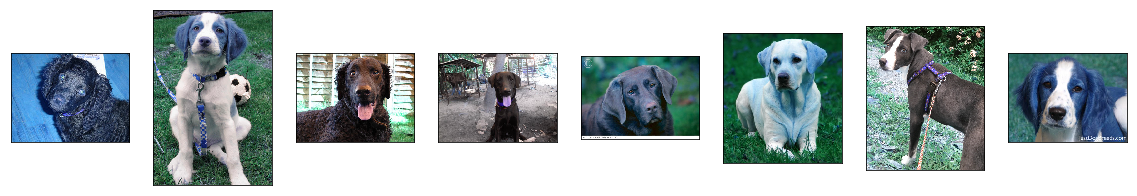

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))
for i in range(len(images)):
    ax = fig.add_subplot(1,len(images),i+1,xticks=[],yticks=[])
    ax.imshow(images[i])

## Obtain vgg16

In [2]:
from keras.applications.vgg16 import VGG16

# include_top=False will cut the dense layers at the end of the model
model = VGG16(include_top=False)

model.summary()

58892288/58889256 [==============================] - 10s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_poo

## determine what to retain in the model with the 4 cases of transfer learning
* small data, similar class
* large data, similar class
* small data, diff class
* large data, diff class

## Tranfer the learning from vgg16
images -> vgg16 (w/o dense) -> features to pass into new Dense